In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [7]:
img=image.load_img("dataset/train/biodegradable/TEST_BIODEG_HFL_0.jpg")

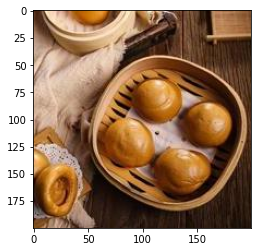

In [8]:
plt.imshow(img)

In [9]:
cv2.imread("dataset/train/biodegradable/TEST_BIODEG_HFL_0.jpg")

array([[[ 41,  60,  97],
        [ 20,  39,  76],
        [ 12,  32,  67],
        ...,
        [ 35,  68, 113],
        [ 29,  60, 105],
        [ 35,  67, 110]],

       [[ 44,  63, 100],
        [ 26,  45,  82],
        [ 15,  35,  70],
        ...,
        [ 51,  84, 129],
        [ 44,  75, 120],
        [ 49,  81, 124]],

       [[ 47,  66, 103],
        [ 34,  53,  90],
        [ 20,  40,  75],
        ...,
        [ 58,  91, 136],
        [ 50,  81, 126],
        [ 54,  86, 129]],

       ...,

       [[ 38,  87, 131],
        [ 33,  82, 126],
        [ 29,  78, 124],
        ...,
        [  8,  17,  31],
        [ 15,  24,  38],
        [  9,  18,  32]],

       [[ 26,  78, 124],
        [ 28,  80, 126],
        [ 29,  81, 128],
        ...,
        [  7,  16,  30],
        [ 14,  23,  37],
        [  9,  18,  32]],

       [[ 25,  80, 125],
        [ 30,  85, 130],
        [ 32,  86, 133],
        ...,
        [  6,  15,  29],
        [ 13,  22,  36],
        [  7,  16,  30]]

In [10]:
cv2.imread("dataset/train/biodegradable/TEST_BIODEG_HFL_0.jpg").shape

(200, 200, 3)

In [11]:
train= ImageDataGenerator(rescale=1/255)
validation= ImageDataGenerator(rescale= 1/255)

In [12]:
train_dataset= train.flow_from_directory("dataset/train/", target_size=(200,200), batch_size=10, class_mode="binary")
valid_dataset= validation.flow_from_directory("dataset/valid/", target_size=(200,200), batch_size=10, class_mode="binary")

Found 2084 images belonging to 2 classes.
Found 643 images belonging to 2 classes.


In [13]:
train_dataset.class_indices
valid_dataset.class_indices

{'biodegradable': 0, 'nonbiodegradable': 1}

In [14]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Flatten(),
    #
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [16]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['accuracy'])

C:\Users\kukre\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [17]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=15,
                    epochs=100,
                    validation_data=valid_dataset
                   )

Epoch 1/100
15/15 [==============================] - 14s 854ms/step - loss: 0.7246 - accuracy: 0.6597 - val_loss: 0.4512 - val_accuracy: 0.7838
Epoch 2/100
15/15 [==============================] - 6s 384ms/step - loss: 0.5638 - accuracy: 0.6867 - val_loss: 0.8635 - val_accuracy: 0.4774
Epoch 3/100
15/15 [==============================] - 5s 367ms/step - loss: 0.5252 - accuracy: 0.7333 - val_loss: 0.6478 - val_accuracy: 0.6983
Epoch 4/100
15/15 [==============================] - 5s 334ms/step - loss: 0.5159 - accuracy: 0.7133 - val_loss: 0.3701 - val_accuracy: 0.8383
Epoch 5/100
15/15 [==============================] - 5s 335ms/step - loss: 0.5656 - accuracy: 0.7133 - val_loss: 0.3321 - val_accuracy: 0.8678
Epoch 6/100
15/15 [==============================] - 6s 373ms/step - loss: 0.4509 - accuracy: 0.7917 - val_loss: 0.3234 - val_accuracy: 0.8631
Epoch 7/100
15/15 [==============================] - 5s 361ms/step - loss: 0.4729 - accuracy: 0.7667 - val_loss: 0.5188 - val_accuracy: 0.746

Epoch 58/100
15/15 [==============================] - 5s 323ms/step - loss: 0.3429 - accuracy: 0.8400 - val_loss: 0.2445 - val_accuracy: 0.8927
Epoch 59/100
15/15 [==============================] - 5s 324ms/step - loss: 0.3487 - accuracy: 0.8267 - val_loss: 0.2511 - val_accuracy: 0.8974
Epoch 60/100
15/15 [==============================] - 5s 319ms/step - loss: 0.2207 - accuracy: 0.9133 - val_loss: 0.3287 - val_accuracy: 0.8709
Epoch 61/100
15/15 [==============================] - 5s 319ms/step - loss: 0.2091 - accuracy: 0.9133 - val_loss: 0.2669 - val_accuracy: 0.8958
Epoch 62/100
15/15 [==============================] - 5s 317ms/step - loss: 0.2704 - accuracy: 0.8733 - val_loss: 0.3036 - val_accuracy: 0.8834
Epoch 63/100
15/15 [==============================] - 5s 315ms/step - loss: 0.3360 - accuracy: 0.8867 - val_loss: 0.2778 - val_accuracy: 0.8756
Epoch 64/100
15/15 [==============================] - 5s 319ms/step - loss: 0.2229 - accuracy: 0.9067 - val_loss: 0.3015 - val_accuracy:

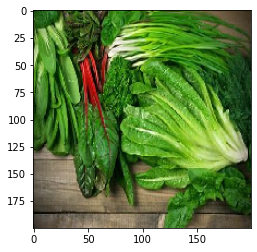

1/1 [==============================] - 0s 19ms/step
BIODEGRADABLE


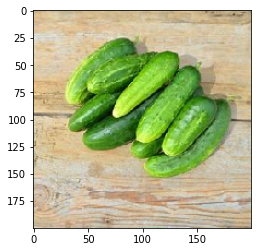

1/1 [==============================] - 0s 18ms/step
BIODEGRADABLE


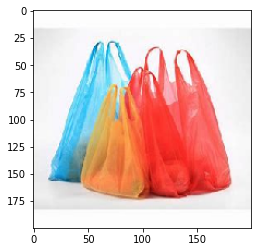

1/1 [==============================] - 0s 19ms/step
NON BIODEGRADABLE


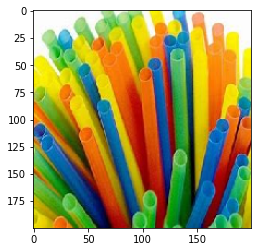

1/1 [==============================] - 0s 19ms/step
NON BIODEGRADABLE


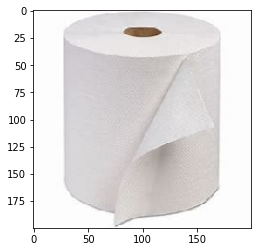

1/1 [==============================] - 0s 18ms/step
NON BIODEGRADABLE


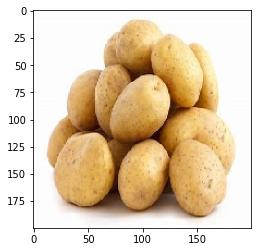

1/1 [==============================] - 0s 19ms/step
BIODEGRADABLE


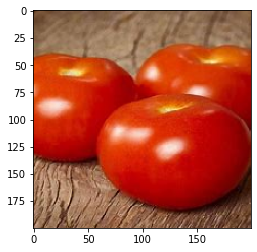

1/1 [==============================] - 0s 19ms/step
BIODEGRADABLE


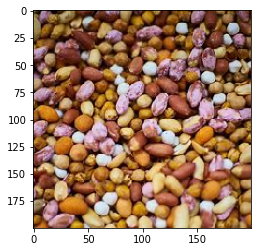

1/1 [==============================] - 0s 19ms/step
BIODEGRADABLE


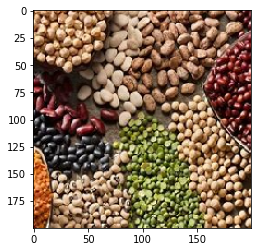

1/1 [==============================] - 0s 19ms/step
BIODEGRADABLE


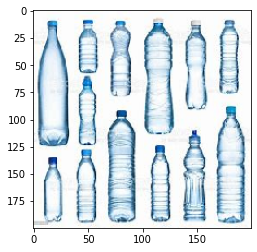

1/1 [==============================] - 0s 18ms/step
NON BIODEGRADABLE


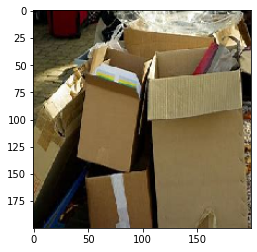

1/1 [==============================] - 0s 17ms/step
BIODEGRADABLE


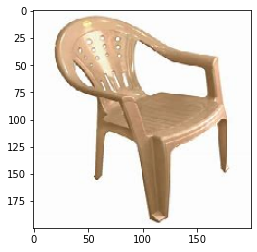

1/1 [==============================] - 0s 19ms/step
NON BIODEGRADABLE


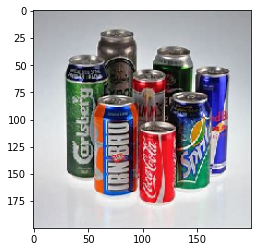

1/1 [==============================] - 0s 18ms/step
NON BIODEGRADABLE


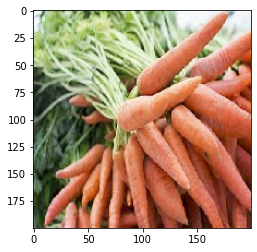

1/1 [==============================] - 0s 19ms/step
BIODEGRADABLE


In [21]:
dir_path="dataset/test2"
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i, target_size=(200,200,3))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    
    result= model.predict(images)
    if result==0:
        print("BIODEGRADABLE")
    else:
        print("NON BIODEGRADABLE")